In [ ]:
!pip install --upgrade  langchain-experimental  qdrant-client datasets sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.7/173.7 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.4/214.4 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 40.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.5/156.5 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 807.5/807.5 kB 55.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.9/256.9 kB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 90.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 37.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 63.6 MB/s eta 0:00:00
     ━━━━━━━━━━

# get the dataset

In [ ]:
from datasets import load_dataset


data = load_dataset(
    "ashraq/fashion-product-images-small",
    split="train"
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
from sentence_transformers import SentenceTransformer, util

images = data["image"]

## create image embadding using openai clip

In [ ]:
model = SentenceTransformer('clip-ViT-B-32')

image_embeddings = model.encode([image for image in images[0:1000]])

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


## set up the vector db to store the embaddings

In [ ]:
from qdrant_client import QdrantClient
from qdrant_client.http import models

# Initialize Qdrant client and load collection
client = QdrantClient(":memory:")
client.recreate_collection(collection_name = "mycollection",
vectors_config = {"image": models.VectorParams( size = 512, distance = models.Distance.COSINE ) } )

True

In [ ]:
from PIL import Image
from io import BytesIO
import base64

def pil_image_to_base64(pil_image):
    """
    Convert a PIL image to a base64-encoded string.

    Args:
        pil_image (PIL.JpegImagePlugin.JpegImageFile): A PIL image object.

    Returns:
        str: The base64-encoded image data.
    """
    byte_io = BytesIO()
    pil_image.save(byte_io, format='JPEG')
    byte_image = byte_io.getvalue()
    base64_image = base64.b64encode(byte_image).decode('utf-8')
    return base64_image

## store the emabddinds with product details in db

  0%|          | 0/44072 [00:00<?, ?it/s]

15970
Turtle Check Men Navy Blue Shirt


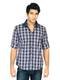

39386
Peter England Men Party Blue Jeans


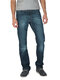

59263
Titan Women Silver Watch


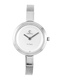

21379
Manchester United Men Solid Black Track Pants


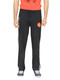

53759
Puma Men Grey T-shirt


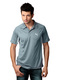

1855
Inkfruit Mens Chain Reaction T-shirt


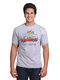

30805
Fabindia Men Striped Green Shirt


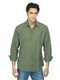

26960
Jealous 21 Women Purple Shirt


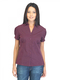

29114
Puma Men Pack of 3 Socks


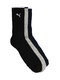

30039
Skagen Men Black Watch


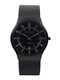

9204
Puma Men Future Cat Remix SF Black Casual Shoes


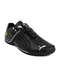

48123
Fossil Women Black Huarache Weave Belt


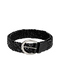

18653
Fila Men Cush Flex Black Slippers


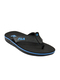

47957
Murcia Women Blue Handbag


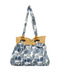

46885
Ben 10 Boys Navy Blue Slippers


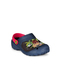

12369
Reid & Taylor Men Check Purple Shirts


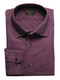

29928
Police Men Black Dial Watch PL12889JVSB


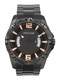

  0%|          | 17/44072 [00:00<04:22, 167.68it/s]

42419
Gini and Jony Girls Knit White Top


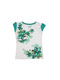

51832
Bwitch Beige Full-Coverage Bra BW335


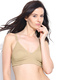

47359
Baggit Women Brown Handbag


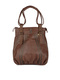

17429
CASIO G-Shock Men Black Digital Watch G-7710-1DR G223


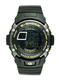

12967
ADIDAS Men Spry M Black Sandals


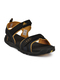

6842
Timberland Unisex Rubber Sole Brush Shoe Accessories


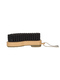

13089
ADIDAS Men Lfc Auth Hood Grey Sweatshirts


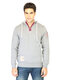

18461
David Beckham Signature Men Deos


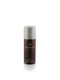

9036
Buckaroo Men Flores Black Formal Shoes


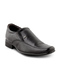

48311
Pitaraa Women Bronze Beaded Bracelet


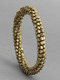

7990
Fila Men's Round Neck Navy Blue T-shirt


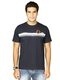

56019
Colorbar Soft Touch Show Stopper Copper Lipstick 037


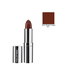

21977
Murcia Women Casual Brown Handbag


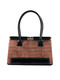

37812
John Players Men Navy Blue Shirt


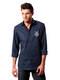

4729
Disney Kids Boy's Crew Sea Life Sialing Green Teen Kidswear


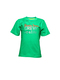

56825
John Players Men Brown Shirt


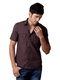

39988
Gas Men Europa White Shoes


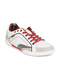

  0%|          | 34/44072 [00:00<04:28, 164.01it/s]

59051
Carlton London Women Black & Gold Toned Flats


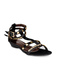

20099
Diva Women Embroided Green Kurta


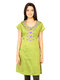

58183
Rocky S Women White Handbag


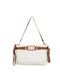

29742
Kiara Women Teal Handbag


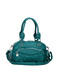

51658
Fossil Women Copper Chronograph Watch CH2589


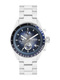

3954
Jealous 21 Women's Pink T-shirt


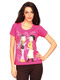

18839
Peter England Men Formal Black Belt


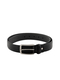

2886
Catwalk Women Leather Brown Flats


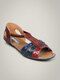

23278
Maxima Ssteele Men Off White Watch


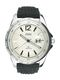

28690
W Women Printed Beige Kurta


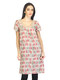

8580
Scullers Men  Grey Waistcoat


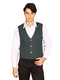

3168
Nike Men's Incinerate MSL White Blue Shoe


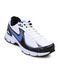

18005
Puma Men Long Logo Black Bermuda


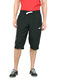

17871
Levis Men Boxer Maroon Brief


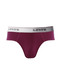

9452
John Miller Men Stripes White Red Shirts


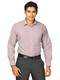

38402
Baggit Women Hood Dabang Black Belt


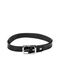

44984
Maxima Women White Dial Watch


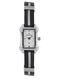

10268
Clarks Men Hang Work Leather Black Formal Shoes


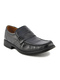

  0%|          | 52/44072 [00:00<04:18, 170.62it/s]

45856
Vishudh Women Brown Kurta


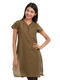

32138
Playboy Men Blue Titanium Briefs


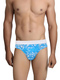

59435
Arrow Men Black Formal Shoes


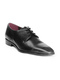

5891
Puma Men's Stripe Polo Black T-shirt


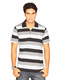

38630
Nike Women Purple Polo T-shirt


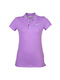

4943
Gini and Jony Boy's Kaleb White Brown Kidswear


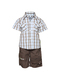

11188
Carrera Men Dial steel finish strap Silver Watches


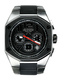

10866
Wrangler Men Motor Rider Red T-Shirts


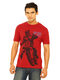

59607
FNF Pink & Grey Wedding Collection Sari


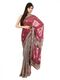

15528
Puma Men Scribble Black Tshirts


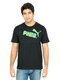

45258
CASIO EDIFICE Men Black Dial Chronograph Watch ED60


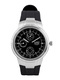

42841
French Connection Women Beige Handbag


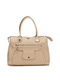

22198
Timberland Men Black Casual Shoes


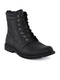

29570
Vans Men Classic Slip-On Purple & Black Shoes


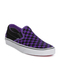

43993
Police Women Passion Perfume


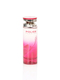

6628
ADIDAS Men's Lowell White Silver Shoe


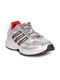

54924
Do U Speak Green Men Blue Shorts


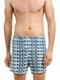

26538
ID Men Red Shoes


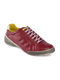

  0%|          | 70/44072 [00:00<04:14, 172.59it/s]

35913
Peperone Women Black & White Handbag


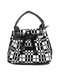

49495
Vans Men Khaki Shoes


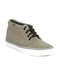

9660
Indigo Nation Men Reversible Bling Pink Shirts


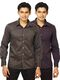

2288
Nike Women Black T-shirt


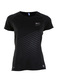

23876
ADIDAS Men Blue Sweatshirt


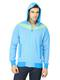

18237
Manchester United Men Solid Red Tshirt


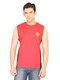

54118
Rocia Women Black Flats


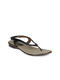

2872
Catwalk Women Leather Flats


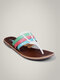

49653
Mineral Women Green Top


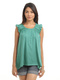

8574
Crocs Dora Boots Pink Sandals


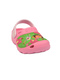

16957
Image Men Sunglasses


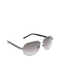

19123
Lotto Men XL Water Man Silver Slippers


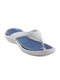

13419
United Colors of Benetton Men Solid Pink Polo T-shirts


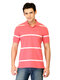

17885
Levis Men Comfort Style Grey Innerwear Vest


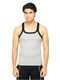

43369
Reebok Men Black Possession Flip Flops


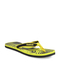

48781
Lucera Women Silver Pendant


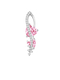

44970
Maxima Men White Dial Analog Chronograph Watch


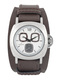

39524
Peter England Unisex Orange Sleeve Bag


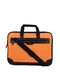

33822
Puma Men Axis White & Grey Sports Shoes


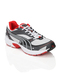

  0%|          | 89/44072 [00:00<04:09, 176.57it/s]

58513
Tonga Women Maroon Top


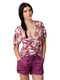

25947
Femella Women Brown Scarf


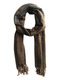

5865
ADIDAS Men's Twelve Faster T-shirt


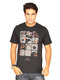

39716
Arrow Woman Women Blue Dress


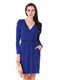

25349
Levis Men Red Brief


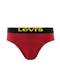

11940
Ganuchi Men Casual Black Sandals


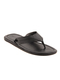

55802
SDL by Sweet Dreams Women Green Printed Night Suit S11-3124


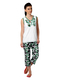

29584
Indigo Nation Men Printed Black T-shirt


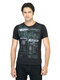

43967
DKNY Women Red Delicious Perfume


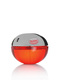

28456
Urban Yoga Women Blue Skirt With Leggings


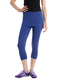

34009
Gini and Jony Girls Black Top


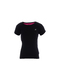

19311
Nike Men Air Rift MTR White Casual Shoe


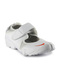

42089
ADIDAS Men White Corona Sports Shoes


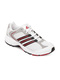

22950
Fastrack Unisex Black Dial Watch 9915PP13


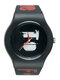

49461
Vans Men Blue Era Scilla Plaid Shoes


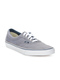

8746
Crocs Kids Navy Blue Clogs


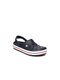

9694
Classic Polo Men Vulcan White Polo Tshirts


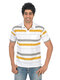

23882
Fila Men Destiny Grey Sports Shoes


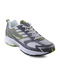

34835
ADIDAS Men Blue Chill Sports Shoes


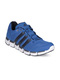

15984
Turtle Check Men Yellow Shirt


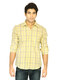

  0%|          | 109/44072 [00:00<04:01, 181.78it/s]

41268
Arrow Men Black Wallet


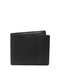

11518
Catwalk Women Gun Metal Grey Heels


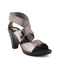

14856
United Colors of Benetton Women Solid Beige Wallets


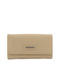

33648
Lotto Men Ridge Brown Sandals


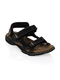

59297
U.S. Polo Assn. Men White & Navy Blue Shirt


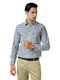

28032
Jockey ELANCE Men Bikini White Brief 1005


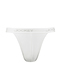

27846
Scullers For Her Charcoal Blazer


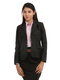

26994
Jealous 21 Women Black Jeans


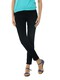

49839
iPanema Women Red Flip Flops


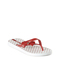

31923
Fabindia Women Blue Silk Sling Bag


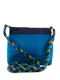

2618
Carlton London Women Silver Wedge Sandal


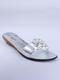

54588
Sushilas Women Printed Green Kurta


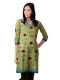

49005
Lucera Women Silver Ring


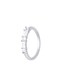

8322
Doodle Boy's Route 66 Biker Blue Teen Kidswear


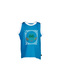

13841
ADIDAS Unisex Three Small Dials White Watches


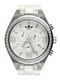

28200
Ray-Ban Men Active Lifestyle Copper Sunglasses


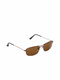

12993
ADIDAS Kids Adispeed Black Sports Shoes


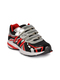

7158
Scullers Men  Green Check Shirt


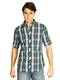

18495
Puma Men Fashion Cat White Slipper


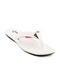

  0%|          | 128/44072 [00:00<04:08, 176.59it/s]

8110
Fastrack Men Economy 2 Analg Black Watch


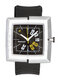

19547
United Colors of Benetton Men Solid Blue Sweatshirt


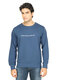

7964
Puma Men's Large Logo Graphic Black T-shirt


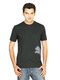

36934
Giorgio Armani Women Idole Perfume


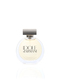

39140
Aneri Women Black & Maroon Salwar Suit


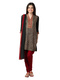

20851
Spice Art Women Ribbon Embroidery Red Clutch


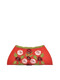

41866
Estd. 1977 Men Beige & Green Sandals


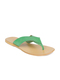

58177
Rocky S Women Brown Handbag


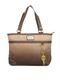

44528
Coolers Men Black Sandals


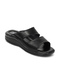

16392
Levis Men Check Red Shirts


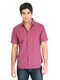

51455
Tonga Women Pink Printed Shrug


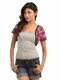

50587
Chromozome Men Grey Briefs


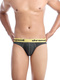

17240
U.S. Polo Assn. Men Stripes Black  Polo Tshirt


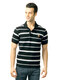

47530
Portia Women Copper-Toned & Brown Sandals


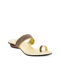

6617
Spykar Men Black and white Check Shirt


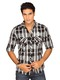

12732
Nike Unisex Swoosh Black Backpack


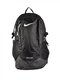

3365
Myntra Men's Brain Black T-shirt


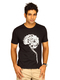

42042
Nike Men Air Relentless 2 MSL White Sports Shoes


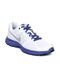

23849
ADIDAS Men Black Anzo Breeze Casual Shoes


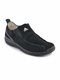

  0%|          | 147/44072 [00:00<04:03, 180.17it/s]

43190
Fastrack Women White Dial Watch


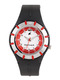

48578
Revv Men Steel Bracelet


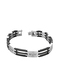

30462
Lovable Women All Day Long Black Bra


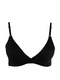

18208
Manchester United Men Solid White Cap


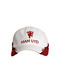

54127
Rocia Women Black Heels


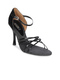

10065
Puma Men ducati logo tee Yellow Tshirts


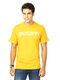

24250
Numero Uno Men White Casual Shoes


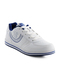

32335
Q&Q Men Silver-Toned Dial Analogue Watch Q252J404Y


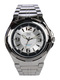

25382
Levis Men White Innerwear Vest


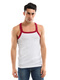

56670
Maxima Men Black Dial Watch


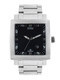

5092
Wrangler Men's Minstrel Shoulder Loop Purple T-shirt


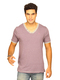

10859
Wrangler Men Furious Rides Navy Blue T-Shirts


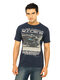

59638
FNF Green Wedding Collection Sari


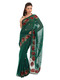

15517
Rockport Men LLandro Red Casual Shoes


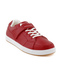

4140
Skechers Women Green Shoe


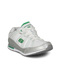

36795
Maxima Men Ssteele Silver Dial Watch


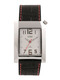

40527
Titan Men Gold Dial Watch


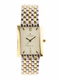

10257
John Miller Men Solid Type Black Trousers


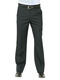

24062
Locomotive Men Navy Blue Printed T-shirt


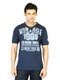

45869
Maxima Men Brown Dial Watch


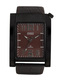

11385
United Colors Of Benetton Women Light Winter Black Sweatshirts


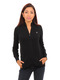

  0%|          | 168/44072 [00:00<03:53, 187.99it/s]

53130
Catwalk Women Brown Sandals


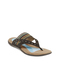

44187
Nike Fragrances Women 5th Element Perfume 150 ml


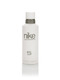

21510
Kiara Women Graphiti White Handbag


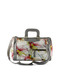

51667
Louis Philippe Men Grey Sunglasses


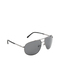

22395
Mark Taylor Men Striped Blue Shirt


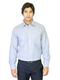

35322
Fabindia Women Anusuya Silver Earrings


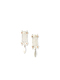

6425
Lotto Unisex Canvas Black Check Shoe


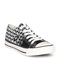

18806
Peter England Men Casual Tan Belt


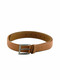

23247
Arrow Men Formal Black Shoe


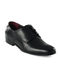

17072
Lino Perros Women Weaved  Grey Belt


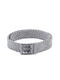

31782
Lee Women Paula Blue Top


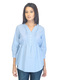

42270
Vans Unisex Black & Grey Classic Shoes


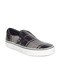

12500
United Colors of Benetton Men Short Black Shirts


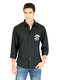

26735
Reebok Men Pack of 2 Pirates of the Caribbean Deos


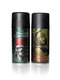

30650
Nike Men Printed Black T-shirt


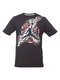

56026
Colorbar Soft Touch Mousse Lipstick 025


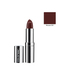

21948
Murcia Women Casual Brown Handbag


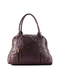

32563
ONLY Women directoire blue Trousers


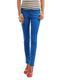

58980
Colour me Women Flowers Deo


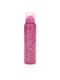

40143
Gini and Jony Girls Pretty Blossom Blue Top


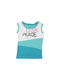

10633
Carlton London Men Formal Brown Formal Shoes


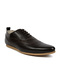

24406
Vishudh Women Red Printed Kurta


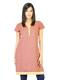

4716
ADIDAS Unisex Response ST Analogue Black Watch


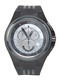

21174
s.Oliver Women Stripes Beige Top


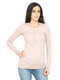

  0%|          | 192/44072 [00:01<03:36, 202.75it/s]

15341
Nike Women Solid Pink Shorts


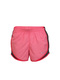

52486
Red Rose Maroon Camisole


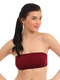

53554
Probase Multicoloured Printed Boxers


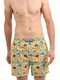

14293
Classic Polo Men Stripes Blue Tshirts


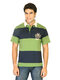

47366
Baggit Women Blue Bag


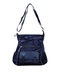

6041
UCB Men's Polo Neck With Lion Logo Navy Blue T-shirt


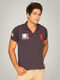

23623
Doodle Kids Girls Pink I love Shopping Top


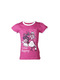

17416
Lotto Men Atlantica Black Sports Shoe


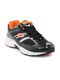

9835
Little Miss Women Printed Grey T-shirt


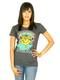

29319
ADIDAS Unisex Chicago Bulls Red Backpack


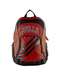

7193
Jealous 21 Women Black Jegging


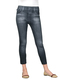

12958
ADIDAS Men Sports Black Sports Shoes


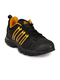

27283
Mother Earth Women Magenta Kurta


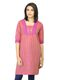

30234
Numero Uno Men Black Flip Flops


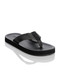

9009
Murcia Women Snake Print Bag Brown Handbags


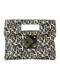

3533
Myntra Men's If You Don't Like Navy Blue T-shirt


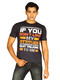

42614
Estelle Women Earrings & Pendant Set


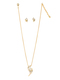

12164
Aurelia Women Voile Orange Dupatta


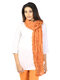

26351
DKNY Women White Dial Watch NY8472


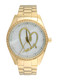

17624
ADIDAS Men Solid Navy Blue Track Pant


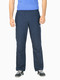

47154
Gini and Jony Girls Black Capris


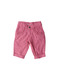

  0%|          | 213/44072 [00:01<03:40, 199.06it/s]

35574
Gliders Men Esquire Red Flip Flops


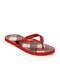

46086
ADIDAS Women Lavender Hagkok Sports Shoes


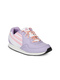

51031
Enamor White Bra


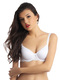

13284
Gini and Jony Kids Boys Solid Black Shorts


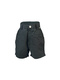

54543
F Sports Men White Outlander Sports Shoes


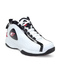

55491
Revlon Gold Dust Poussiere Doree Colorburst Lip Gloss 024


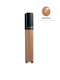

26163
John Miller Men Dark Grey Trousers


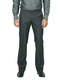

3701
Tantra Women Flower Heart Black Long T-shirt


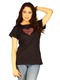

29917
Police Men White Dial Watch PL12698JS


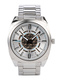

42426
Aurelia Women Sea Green Kurta


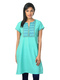

32751
FILA Men Liga II Black Shoes


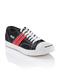

56214
Estelle Women Gold Earrings


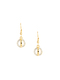

10401
Jealous 21 Women Uaine Purple Tops


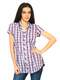

40371
Tokyo Talkies Women Navy Slim Fit Jeans


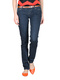

21346
Pal Zileri Men Casual Gold Frame Sunglasses


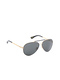

45603
Arrow Men Black Formal Shoes


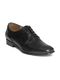

4524
Puma Men's YugoRun Black White Shoe


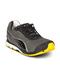

37223
United Colors of Benetton Women Blue Top


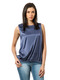

53766
Puma Men White and Navy Blue T-shirt


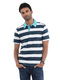

25520
Doodle Kids Girls City Chic White Top


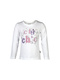

32597
ONLY Women Black Top


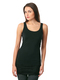

  1%|          | 234/44072 [00:01<03:37, 201.21it/s]

58974
Colour me Men Gold Deo


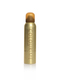

33445
Baggit Women Lamboo Mayur Black Wallet


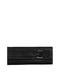

57100
Elle Women Dark Pink Top


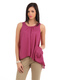

36137
Nike Women Free Run Pink Sports Shoes


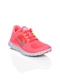

41859
Estd. 1977 Men Black Sandals


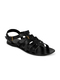

21180
ADIDAS Men Adi Cells Black Flip Flops


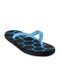

39943
GAS Men Brown Count Casual Shoes


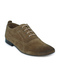

52472
Red Rose Women White & Pink Polka Dot Print Bath Robe


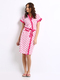

58148
Puma Unisex White Cap


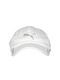

20052
United Colors Of Benetton Women Yellow Muffler


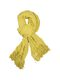

5630
ADIDAS Women's Adi Groove Blue Flip Flop


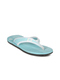

44517
Coolers Men Brown Pokar Flip Flops


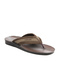

47392
Baggit Women Beige Bag


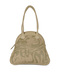

50325
Aurelia Women Navy Blue Kurta


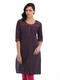

8913
Puma Men Cabana Racer Sketch White Sports Shoes


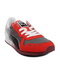

16530
Locomotive Men Check Red Shirt


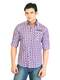

22705
Nike Men White Capri II Casual Shoe


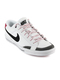

7167
Scullers Men Scul Purple White Shirt


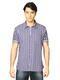

46240
Fusion Beats Women White Printed Tunic


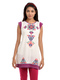

27277
Mother Earth Women Blue Kurta


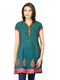

13042
Inc 5 Women Brown Heels


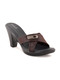

  1%|          | 255/44072 [00:01<03:36, 202.07it/s]

6889
Forever New Women Stone Cream Jacket


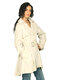

31312
W Women Peach Kurta


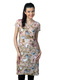

12190
Basics Men Blue Slim Fit Checked Shirt


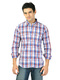

55657
Catwalk Women Golden Wedges


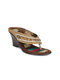

19578
United Colors of Benetton Women Solid Purple Top


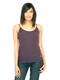

27879
Scullers For Her Women Blue Top


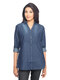

34452
Rocia Women Copper Sandals


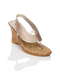

6287
Classic Polo Men's Swiss Yellow T-shirt


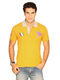

7355
Tantra Men's Black Sabbath Navy T-shirt


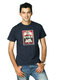

46072
Lino Perros Men Black Leather Belt


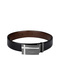

22537
Gas Men Eldorado Tan Casual  Sandals


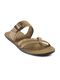

28831
Enamor Women Pack of 3 Mid-Rise Bikini Brief


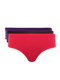

43500
French Connection Men White T-shirt


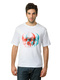

2627
Carlton London Women Wedge Silver Sandal


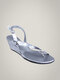

27045
Yelloe Off White Fur Zip Clutch


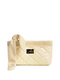

13270
Palm Tree Kids Girls Printed White Tops


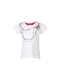

18698
Hanes Men Grey Ultimate Duo Dry Cotton Stretch Bikini Briefs


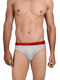

55465
Revlon Super Lusterous Lipstick 304


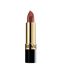

26197
Formula 1 Go Men Perfume


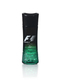

31120
Palm Tree Girls Pink Top


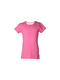

25712
ADIDAS Unisex Blue Cap


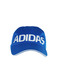

11527
United Colors of Benetton Men Olive Tshirts


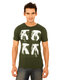

14869
United Colors of Benetton Men Solid Black Wallets


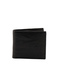

  1%|          | 278/44072 [00:01<03:28, 210.18it/s]

40385
Tokyo Talkies Women Yellow Top


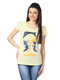

15187
Arrow Sport Men Solid White Polo Tshirts


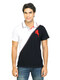

44725
Lotto Women Coral Elegant Flip Flops


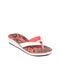

14055
Flying Machine Men Check Green Shirts


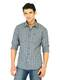

20260
Wrangler Men Applique Navy Blue Tshirt


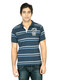

7731
Puma Men's Winglet II Grey Yellow White Flip Flop


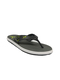

22153
Lee Cooper Men Brown Casual Sandals


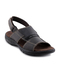

43958
Puma Men Olive Techno Ind Sandal


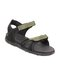

28469
Urban Yoga Women Printed Pink T-shirt


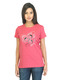

50573
Chromozome Men Charcoal Trunk Trunks


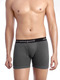

34036
Palm Tree Boys Check Blue Shirt


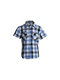

8779
Indigo Nation Men Club Satin Hot Stepper Navy Blue Shirt


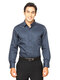

3391
Murcia Women White With Stitch Bag


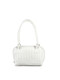

43164
Fastrack Men Black Watch


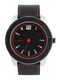

2243
ADIDAS Men Stripe Polo White Polo T-shirt


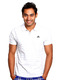

30496
Lovable Women Fiona Purple Bra


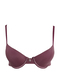

27421
Jockey Women Blue Lounge Pants


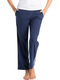

57756
Lotus Herbals Neem & Clove Purifying Face Wash


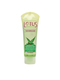

33213
Sepia Women Printed Magenta Top


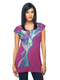

39729
Arrow Woman Olive Top


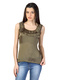

25376
Levis Men Grey Innerwear T-Shirt


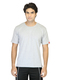

11143
Scullers Men Price Catch Black Shirts


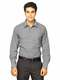

  1%|          | 300/44072 [00:01<03:28, 209.63it/s]

56684
Fabindia Beige & Maroon Mull Printed Saree


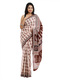

4988
Gini and Jony Girl's Vanya White Polka Dot Kidswear


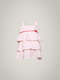

44341
Indian Terrain Men Blue T-shirt


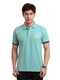

14431
Enroute Women Casual Black Flats


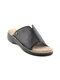

20604
Baggit Women Umbrella Dum Brown Handbag


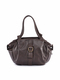

52224
Lencia Grey Swarovski Pearl Necklace


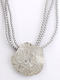

45293
CASIO SHEEN Women Red Dial Watch SX017


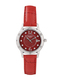

36761
Maxima Men Black Watch


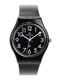

33021
Mother Earth Women Printed Cream Kurta


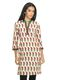

25144
Lino Perros Women Leatherite Orange Handbag


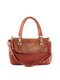

11371
United Colors Of Benetton Men Summer Black Shirts


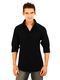

41401
Wrangler Women White Smocked Top


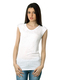

14603
United Colors of Benetton Men Pack of 2 Grey Socks


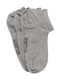

37481
Esprit Women White Dial Watch


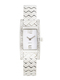

5254
Wildcraft Unisex Red Duffle Bag


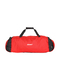

44173
Nike Fragrances Women Trendy Perfume 75ml


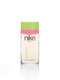

25978
J.Del Pozo Halloween Kiss Sexy Women Perfume


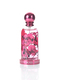

4386
Wrangler Cowboy Photo T-shirt


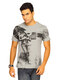

51693
Van Heusen Unisex Brown Sunglasses


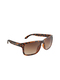

16154
Enroute Men Leather Black Formal Shoes


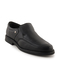

22361
Reebok Men Navy Twist Sandals


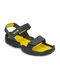

  1%|          | 321/44072 [00:01<03:28, 209.46it/s]

29789
Basics Men Pack of 3 T-shirt


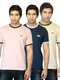

19920
Wildcraft Unisex Black Outdoor Backpack


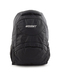

7503
Nike Men's As Icon Blue T-shirt


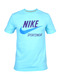

46624
Rasasi Men Emotion Deo and Perfume Set


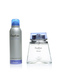

34204
Proline Men Navy Track Pants


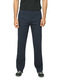

17086
Lino Perros Women Blue Zip Orange Wallet


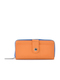

50741
Red Chief Men Black Shoes


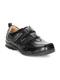

55233
Lakme Nine to Five Flawless Makeup Shell Foundation


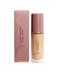

13426
United Colors of Benetton Men Stripes Red  Polo T-shirts


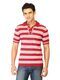

43356
Reebok Women Charcoal Grey Fuel Techno Sports Shoes


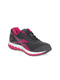

28207
Ray-Ban Men Active Lifestyle Black Sunglasses


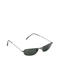

13846
John Miller Men Stripes Blue Shirts


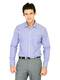

12994
ADIDAS Kids Boys Duramo Synthetic Black Sports Shoes


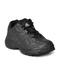

46278
109F Women Red & White Striped Tunic


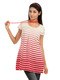

16508
Locomotive Men Washed Blue Jeans


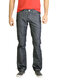

18492
Puma Men Danny Blue Slipper


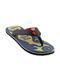

19540
United Colors of Benetton Men Solid Blue Sweater


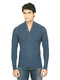

7963
Puma Men's Large Logo Graphic White French T-shirt


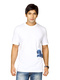

8117
Fastrack Men New Analog Black Navy Watch


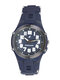

49230
Calzini Men Pack of 5 Sports Socks


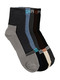

39147
Aneri Women Purple Salwar Suit


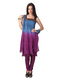

  1%|          | 342/44072 [00:01<03:34, 203.51it/s]

36933
Bulgari Women Omnia Perfume


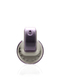

57138
Elle Women Brown Trousers


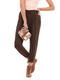

20856
United Colors of Benetton Men Casual Black Shoes


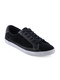

41861
Estd. 1977 Men Black Sandals


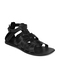

5608
ADIDAS Men Kendall Black Navy Floater


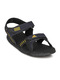

58170
Rocky S Women Red Clutch


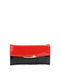

53598
Q&Q Men Black Digital Watch


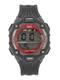

15983
Turtle Solid Men  Burgundy Shirt


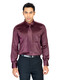

39375
Helix Women Silver Dial Watch


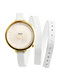

14851
United Colors of Benetton Women Solid Coffee Brown Wallets


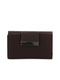

59290
Titan Men Black Dial Watch


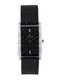

52678
Morellato Men Black Watch


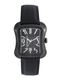

20258
Wrangler Men Polo Charcoal T-shirt


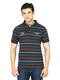

47198
Franco Leone Men Brown Sandals


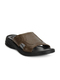

27841
Bulchee Men Plain Jeans White Belt


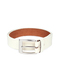

28035
Jockey ELANCE Men Grey Melange Y Front Briefs 1006


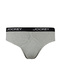

31924
Fabindia Women Black Silk Handbag


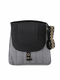

26993
Jealous 21 Women Washed Blue Jeans


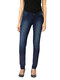

13248
Palm Tree Kids Boy Solid Brown Trousers


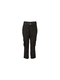

43538
French Connection Women Blue Top


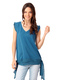

8325
Doodle Boy's Athletic 77 Dept Yellow Teen Kidswear


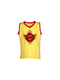

31118
Gini and Jony Girls Red Top


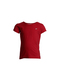

19772
ADIDAS Men Vigor Blue Casual Shoes


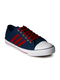

  1%|          | 365/44072 [00:01<03:27, 210.52it/s]

46876
Lino Perros Men Pack of 2 Socks


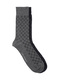

5862
ADIDAS Men's Stripe Black T-shirt


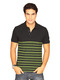

39711
ADIDAS Original Men Black Dial Chronograph Watch ADH2641


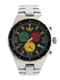

14409
Enroute Women Casual White Heels


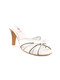

58726
Puma Men Grey T-shirt


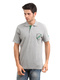

44379
ADIDAS Men Intense Touch  Perfume


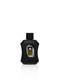

11947
Ganuchi Men Casual Olive Sandals


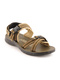

36759
Maxima Men White Dial Watch


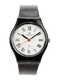

51499
Denizen Women Blue Jeans


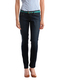

29583
Puma Women Grace Silver Sandals


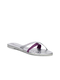

55805
SDL by Sweet Dreams Women Pink & Black Printed Night Suit S11-3134


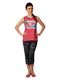

7709
Jealous 21 Women's Aaren Black Jegging


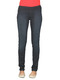

28451
Urban Yoga Women Black Track Pants


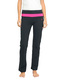

43960
Indigo Nation Men Grey Striped Shirt


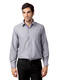

8741
Indigo Nation Men Checks Shirt Navy Blue Shirts


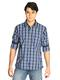

55039
Lakme Absolute Matte Merlot Lipstick 45


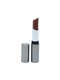

19316
Nike Unisex Hayward 25M Grey Backpack


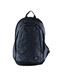

27419
Jockey Women Black Lounge Pants


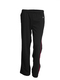

34832
ADIDAS Men Sukoi White Sports Shoes


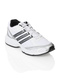

23885
Fila Men Grey Hex Sports Shoes


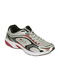

19918
Wildcraft Unisex Black Backpack


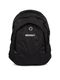

22359
John Players Men Check Blue Shirt


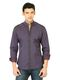

19124
Lotto Women XL Kelly Pink Slippers


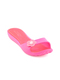

16950
Image Men Sunglasses


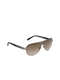

49654
Mineral Women Grey Skirt


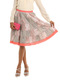

  1%|          | 390/44072 [00:01<03:19, 219.05it/s]

48786
Lucera Women Silver Pendant


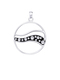

2049
ADIDAS Men's Slim Fit White T-shirt


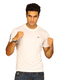

17882
Levis Men Comfort Style White Innerwear Vest


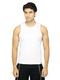

44977
Maxima Men Silver Dial Attivo Watch


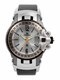

33019
Mother Earth Women Printed Yellow Kurta


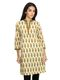

41439
Lee Cooper Men Black Sports Shoes


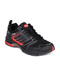

39523
Peter England Unisex Black One Dayer Black Trolley Bag


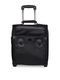

52812
JAG Men Black Leather Wallet


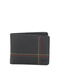

11349
Lee Men Blue Chicago Fit Jeans


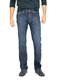

24892
United Colors of Benetton Men Black T-shirt


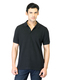

58514
Tonga Women Grey Top


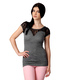

33825
Puma Women Kuris Silver & Grey Sports Shoes


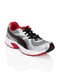

25940
Femella Women Yellow & Blue Scarf


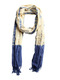

38637
Nike Men Red Delhi T-shirt


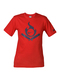

5896
Puma Men Cavallino Black Shoe


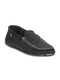

4944
Gini and Jony Boy's Kaleb White Brown Infant Kidswear


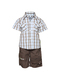

10861
Wrangler Men Dirt Riders White T-Shirts


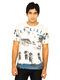

59600
FNF Rust Wedding Collection Sari


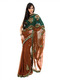

42846
French Connection Women Multi Stripe Hand Bag


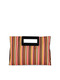

35128
Allen Solly Woman Purple Bangle


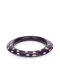

47508
Facit Men Black Brief


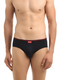

54923
Do u speak Green Girls Olive 3/4 Pant


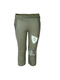

  1%|          | 412/44072 [00:02<03:21, 216.87it/s]

43994
Police Women Passion Deo


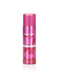

17278
U.S. Polo Assn. Men Printed  Steeple Grey Tshirt


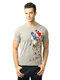

31588
Mark Taylor Men Printed Maroon T-shirt


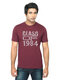

49492
Vans Men Maroon & Grey Era Shoes


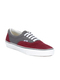

18230
Manchester United Men Printed White Tshirt


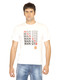

23871
ADIDAS Men Grey Striped T-shirt


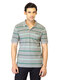

9667
Indigo Nation Men Bling Red Black Shirts


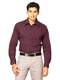

16198
Puma Men Poly Knitted Black Tracksuit


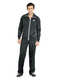

3953
Jealous 21 Women's Red Peace T-shirt


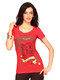

29745
Fossil Men Quartz Black Dial Chronograph Watch JR1303


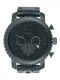

28697
W Women Printed Black Kurta


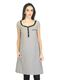

12538
Puma Men Solid Blue Track Pants


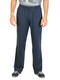

8587
Scullers Men Red Check Shirt


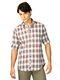

42248
Sepia Women Pink Top


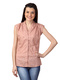

48772
Lucera Women Silver Pendant


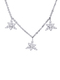

17876
Levis Men Comfort Style Grey Innerwear Vest


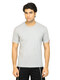

30668
Park Avenue Men Black Sunglasses


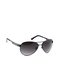

9455
John Miller Men Red Striped Shirt


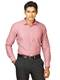

18002
Puma Women Essential Skinny Black 3/4 Pant


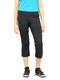

44983
Maxima Women Silver Dial Watch


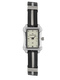

38405
Baggit Women White Capri Taj Belt


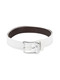

53934
Kiara Women Brown Handbag


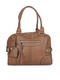

  1%|          | 434/44072 [00:02<03:26, 210.98it/s]

1638
Nabaiji Swimming Goggles Blue Black


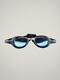

25188
Lino Perros Women Leatherite Brown Handbag


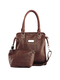

24866
Reid & Taylor Men Formal Black Belt


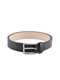

53108
Fabindia Silver Earrings


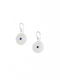

21528
Kiara Women Sequins Copper Handbag


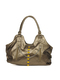

59432
Spice Art Women Black Handbag


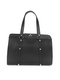

32903
Allen Solly Women Red Shorts


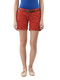

6079
UCB Men's Johny Collar With Two Tone Grey T-shirt


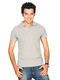

12960
ADIDAS Men Sports White Sports Shoes


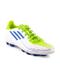

29321
ADIDAS Men Black Jersey


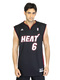

9031
Buckaroo Men loma Tan Casual Shoes


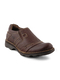

6845
Timberland Unisex Hiker Round Lace Shoe Accessories


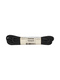

18466
Reebok Reebounce Women Perfumes


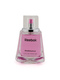

26369
Arrow Woman Blue Shirt


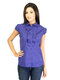

33489
Doodle Kids Boy Check Green Shirt


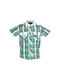

59056
Carlton London Women Blue & Cream Shoes


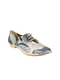

15379
Fila Men Lobato Black Casual Shoes


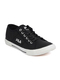

45409
Rocia Women Black & Brown Sandals


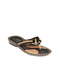

56822
John Players Men Beige Shorts


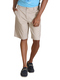

58184
Rocky S Women Beige Handbag


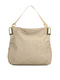

40947
Gini and Jony Boys Core Red T-shirt


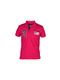

39381
Peter England Men Party Black Jeans


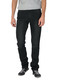

15977
Turtle Solid Men Red Shirt


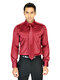

32769
Music Men Printed Blue T-shirt


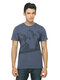

10439
Flying Machine Men Walnut Brown Tshirts


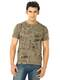

  1%|          | 459/44072 [00:02<03:16, 221.53it/s]

59264
Titan Women White Watch


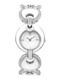

14099
Flying Machine Women Solid Pink Tops


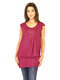

1852
Inkfruit Men Ride It Or Die T-shirt


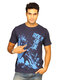

30802
Fabindia Men Blue Shirt


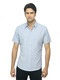

51009
Enamor Rose Full Figure Bra FF07


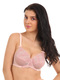

29113
Puma Women Pack of 3 Socks


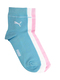

7399
Red Tape Men's Black Formal Shoe


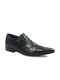

26967
Jealous 21 Women Check Navy Blue Top


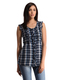

27089
Aneri Women Jazz Brown Kurta


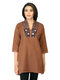

48124
Fossil Women Brown Huarache Weave Belt


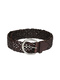

9203
Puma Men Axis XT Black Shoes


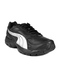

51835
Bwitch Red Lace  Briefs


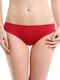

3739
ADIDAS Men Delhi Daredevil Blue Cap


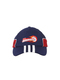

19786
U.S. Polo Assn. Men Solid Navy Blue Tshirt


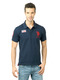

44948
Puma Men Black Aquil II Sports Shoes


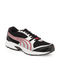

24091
Manchester United Men Navy Blue Striped T-shirt


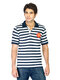

33026
Mother Earth Women Pink Kurta


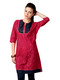

41406
Wrangler Women Pink T-shirt


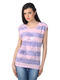

11376
United Colors Of Benetton Women Light Winter Grey Tops


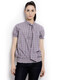

25143
Lino Perros Women Silver Clutch


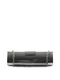

44174
Nike Fragrances Women Sensual Touch Perfume and Deo Set


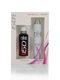

5253
Wildcraft Unisex Black & Grey Duffel Bag


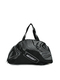

20431
Baggit Women Tijori Viva Brown Wallet


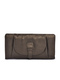

  1%|          | 482/44072 [00:02<03:18, 219.05it/s]

14604
United Colors of Benetton Men Stripes Green Socks


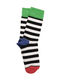

4381
Superman Men's Silhouette Light Blue T-shirt


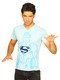

46623
Nike Unisex Ultimatum Max Backpack


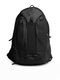

19927
ADIDAS Men Receptor Grey Sandals


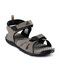

7504
Nike Women's Smash Pink T-shirt


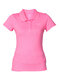

22366
Ed Hardy Men New Tiger White T-Shirt


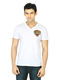

3998
Spalding Men's Black and White Graphic Flip Flop


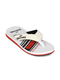

51694
Van Heusen Unisex Sunglasses VH216-C2


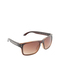

16153
Enroute Men Leather Black Formal Shoes


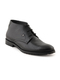

17081
Lino Perros Women Denim Blue Wallet


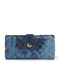

50746
Red Chief Men Black Formal Shoes


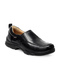

34203
Proline Men Charcoal Grey Track Pants


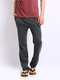

55234
Lakme 9to5 Flawless Makeup Marble Foundation


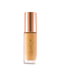

13421
United Colors of Benetton Men Stripes Black Polo T-shirts


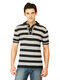

27614
Scullers Men Beige Trousers


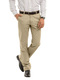

22154
Lee Cooper Men Black Formal Shoes


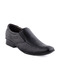

16361
Peter England Men Stripes Maroon Shirt


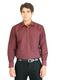

46411
ADIDAS Men Black Sweatshirt


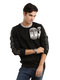

7736
Puma Men Ferrari Lifestyle Red Cap


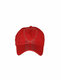

34031
Gini and Jony Boys Check Blue Shirt


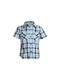

50574
Chromozome Men Pack of Two Trunks


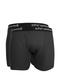

22968
U.S. Polo Assn. Unisex Casual Olive Backpack


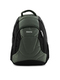

  1%|          | 504/44072 [00:02<03:23, 214.29it/s]

3396
Murcia Women Turquoise Blue Handbag


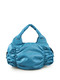

31543
Classic Polo Men Striped Navy Blue T-shirt


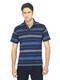

19329
Puma Men Standpunkt Brown Casual Shoes


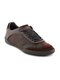

13613
Hanes Men Sleeveless V Neck Red Innerwear T-shirt


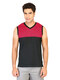

27426
Jockey Women Grey Melange Shorts


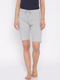

2244
ADIDAS Women's Black T-shirt


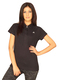

43163
Fastrack Men White Dial Watch


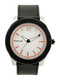

33214
Sepia Women Printed Black & Green Tunic


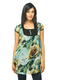

10096
Reebok Women Reeflex Run Blue Sports Shoes


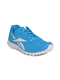

11144
Scullers Men Price Catch Black Shirts


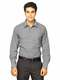

25371
Levis Men Maroon Innerwear Vest


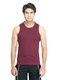

20603
Baggit Women Selection Mayur Black Sling Bag


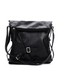

58719
ALayna Women Off White  Kurta


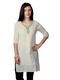

11978
FILA Men Aruba Navy Blue Sandal


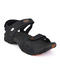

36766
Maxima Men Black Watch


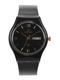

45294
CASIO SHEEN Women Black Dial Watch SX041


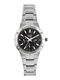

52223
Lencia White Swarovski Pearl Necklace


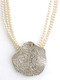

34455
Rocia Women Black Shoes


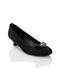

6280
UCB Men's Making Light Pink T-shirt


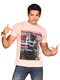

46075
Lino Perros Men Black Leather Belt


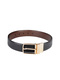

35587
Gliders Men Brown Leather Sandals


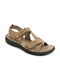

7352
Tantra Men's Whatever Purple T-shirt


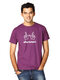

  1%|          | 526/44072 [00:02<03:26, 210.97it/s]

27042
Yelloe Black Animal Print Clutch


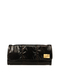

2620
Nike Men's Colors Team India T-shirt


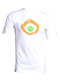

43507
French Connection Men Maroon T-shirt


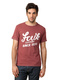

28836
BIBA Women Printed Multi Coloured Kurta


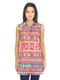

31127
Gini and Jony Girls Black Dress


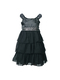

26190
4711 Kolnisch Wasser Men Perfume


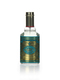

55462
Revlon Super Lustrous Plum Baby Lipstick 313


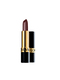

11520
United Colors of Benetton Women Denim Black Jeans


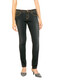

25715
ADIDAS Unisex Blue Cap


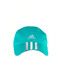

41250
Arrow Men Black & Brown Reversible Belt


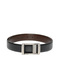

40382
Tokyo Talkies Women Pink Top


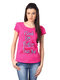

38298
Reid & Taylor Men Brown Wallet


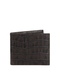

57335
Amante White Bra BCSO01


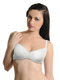

52647
Mod'acc Women Black Handbag


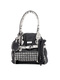

20267
Catwalk Women Casual Black Heels


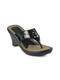

14052
Flying Machine Men Solid White Shirts


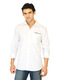

53795
Puma Men Black T-shirt


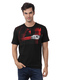

44722
Lotto Women Red & Orange Disco Holic Flip Flops


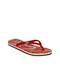

5405
Kalenji Ekiden Comfort Prime 2011


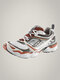

39178
Aneri Women Blue & Brown Printed Kurta


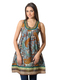

32590
ONLY Women Brown Shorts


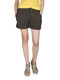

11712
Lee Men Solid Blue Shirts


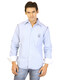

  1%|          | 548/44072 [00:02<03:27, 209.40it/s]

25527
Wrangler Women Stella Green Shirt


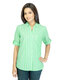

57107
Elle Women Green Essentials Top


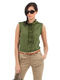

20869
Fila Men Camper Brown Sandals


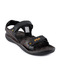

33442
Baggit Women Rade Doko Teal Handbag


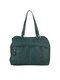

58973
Colour Me Women Pink Perfume


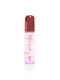

39944
GAS Men Grey Namib Shoes


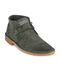

21187
ADIDAS Men Plugged In Yellow Flip Flops


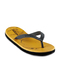

36130
Nike Men Dunk High Grey Shoes


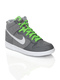

44510
Converse Unisex Black Shoes


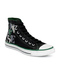

20055
United Colors Of Benetton Women Grey Muffler


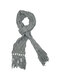

50322
Aurelia Women Black Kurta


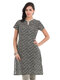

28238
Park Avenue Men Cruise Deo


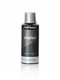

13879
Scullers Men Check Red Shirts


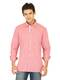

47395
Baggit Women Green Handbag


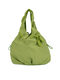

46247
Fusion Beats Women Dark Pink Tunic


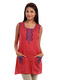

7160
Scullers For Her Women Fashion Summer Lite Aubergine Tunics


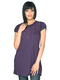

22702
Nike Women Beige Dunk High Casual Shoes


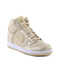

8914
Puma Men Future Cat Remix SF White Sports Shoes


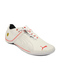

16537
Probase Men Check Blue Cap


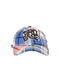

43735
Royal Diadem Set of 2 Golden Bangles


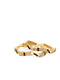

13045
Inc 5 Women Casual Maroon Sandals


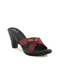

  1%|▏         | 569/44072 [00:02<03:34, 203.21it/s]

27270
Mother Earth Women Printed Maroon Kurta


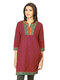

12197
Basics Men Orange Polo T-shirt


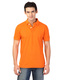

55650
Catwalk Women Multi-coloured Heels


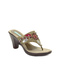

31315
W Women Brown Kurta


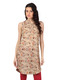

6274
UCB Women's Crystal Benetton Green T-shirt


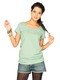

47153
Gini and Jony Girls Pink Capris


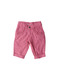

17623
ADIDAS Men Solid Grey Track Pant


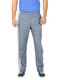

48927
Lucera Women Silver Ring


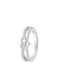

51036
Enamor Women Lavender Nightdress


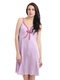

26958
Jealous 21 Women Teal Shirt


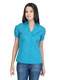

46081
ADIDAS Men Navy Blue Benton Sandals


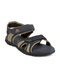

35573
Gliders Men Esquire Blue Flip Flops


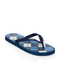

13283
Gini and Jony Kids Boys Check Blue Shirts


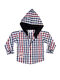

54544
F Sports Men Black Pace Sports Shoes


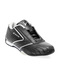

30001
Aspen Women White Dial Watch


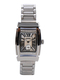

29910
Police Men Black Dial Watch PL12170JSB


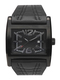

3706
Classic Polo Men's Grey Red & Brown Stripe T-shirt


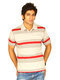

26164
John Miller Men Striped Grey Trousers


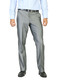

55496
Revlon ColorBurst Hot Pink Lip Gloss 10


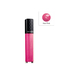

56213
Estelle Women Gold Earrings


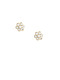

15948
Turtle Men Stripes Burgundy Ties


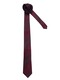

40376
Tokyo Talkies Women Yellow Top


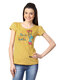

24633
ADIDAS Women Polka Pink Flip Flops


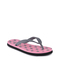

10406
United Colors of Benetton Women Solid Grey Dresses


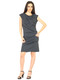

  1%|▏         | 593/44072 [00:02<03:24, 212.48it/s]

4523
Puma Men's Faas Blue White Silver Red Shoe


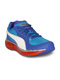

45604
Arrow Men Brown Formal Shoes


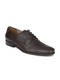

15174
Arrow Men Yellow Polo T-shirt


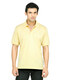

21341
Pal Zileri Men Casual Steel Frame Sunglasses


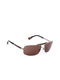

53761
Puma Men Green and Blue T-shirt


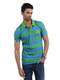

37224
United Colors of Benetton Women Purple Shirt


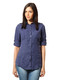

32564
ONLY Women Orange Trousers


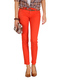

56021
Colorbar Soft Touch Venus Lipstick 034


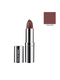

24401
Vishudh Women Brown Printed Kurta


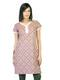

10634
Carlton London Men Black Oxford Wingtip Brogues


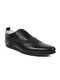

40144
Gini and Jony Girls Pretty Blossom Pink Top


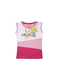

58987
Cavallini Women Deo


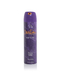

59069
Peri Peri Women White Bra


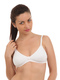

15346
Nike Men Special Edition 3 Star Beed Black Tshirts


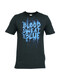

52481
Red Rose Pink & Black Nightdress


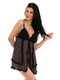

21173
s.Oliver Women Grey Shirt


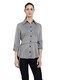

4711
ADIDAS Unisex Toronto Hand Black Watch


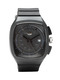

40978
Gini and Jony Boys United Red T-shirt


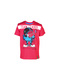

14294
Classic Polo Men Stripes Black Tshirts


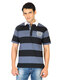

17411
Lotto Men Basketball Mid White Sports Shoe


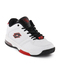

9832
Little Miss Women Printed Rust T-shirt


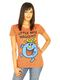

23624
Doodle Kids Girls White I love Shopping Top


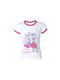

6046
UCB Men Logo Chest Green Shirt


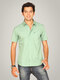

  1%|▏         | 616/44072 [00:03<03:21, 215.62it/s]

34693
Allen Solly Kids Girls Poplin Pink Shorts


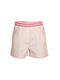

47361
Baggit Women Black Voodoo Gang Handbag


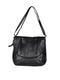

7194
Jealous 21 Women's BFF Printed White Top


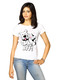

51204
Enamor Women Peach Bra


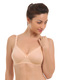

30233
Numero Uno Men White Shoes


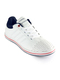

48329
Pitaraa Women Purple Sling Bag


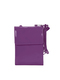

18459
David Beckham Intimately Men Deos


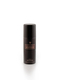

27284
Mother Earth Women Dark Brown Kurta


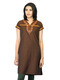

12163
Aurelia Women Solid Purple Leggings


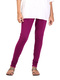

42613
Estelle Women Gold Earring & Pendant Set


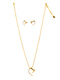

3534
Myntra Women's I Want You Black T-shirt


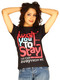

24065
Locomotive Men Checked Green Shirt


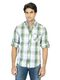

10250
Murcia Women Hahk Brown Handbags


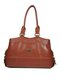

57597
Lotus Herbals Moistpetals Rudy Pink Lipstick 140


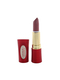

40520
Titan Men Cream Dial Watch


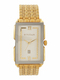

1607
Reebok Men trackpant- male Track Pants


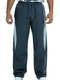

11382
United Colors Of Benetton Women Light Winter Grey T-Shirts


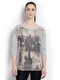

44180
Nike Fragrances Women Spicy Love Perfume 150 ml


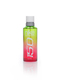

37472
Esprit Men Grey Dial Watch


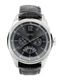

53137
Catwalk Women Brown Sandals


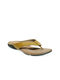

15722
Nike Men Lunarswift+ 3 Shield Grey Sports Shoes


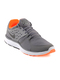

4375
Marvel Comics Men's Comic Poses Navy T-shirt


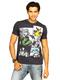

  1%|▏         | 638/44072 [00:03<07:00, 103.32it/s]

35325
Fabindia Women Anusuya Silver Earrings


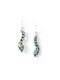

22392
ADIDAS Women Whalf Striper White Top


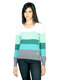

51660
Fossil Men Black Dial Watch AM4384


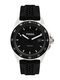

17075
Lino Perros Women Weaved  Navy Blue Belt


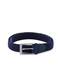

23240
Aneri Women Ashna Blue Kurta


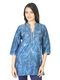

6422
Lotto Unisex Canvas Black Grey Shoe


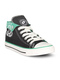

18801
Peter England Men Casual Brown Belt


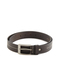

26732
Reebok Women Reestyle Deo


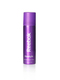

12507
Red Tape Men Casual Black Casual Shoes


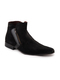

31785
Lee Women Katie Navy Blue Top


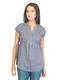

3150
Nike Men's Lunarswift Black Shoe


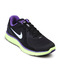

17849
Flying Machine Women This & That Grey Tshirt


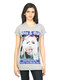

29548
Classic Polo Men Printed Navy Blue T-shirt


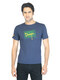

42879
French Connection Women Black Buffy Clutch


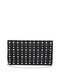

16395
Levis Men Check Black Shirts


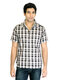

51452
Tonga Women White & Pink Top


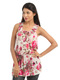

6610
Spykar Men's Stinger Basket Ball Team White Blue Stripes T-shirt


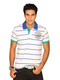

47537
Portia Women Brown Flats


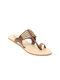

17247
U.S. Polo Assn. Men Stripes Blue Polo Tshirt


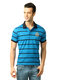

  1%|▏         | 657/44072 [00:03<06:10, 117.04it/s]

23072
Arrow Men Navy Blue Solid Trousers


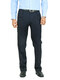

42045
Nike Men Wardour Chukka Yellow Casual Shoes


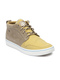

3362
Myntra Men's Creative designs Black T-shirt


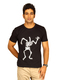

12735
Nike Unisex U Black Caps


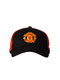

54120
Rocia Women Beige Flats


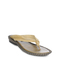

30465
Lovable Women All Day Long Black Bra


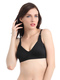

9658
Indigo Nation Men Reversible Bling Maroon Shirt


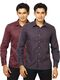

43197
Fastrack Women Grey Dial Watch


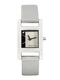

38608
Nike Men Grey T-shirt


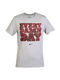

24257
Numero Uno Men Navy Blue Casual Shoes


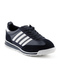

10062
Puma Men Puma runhard tee Grey Tshirts


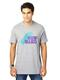

56677
Maxima Men White Dial Watch


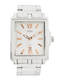

25385
Levis Men Navy Blue Briefs


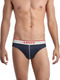

32332
Q&Q Men Steel Digital Watch


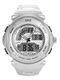

5095
Wrangler Men's Greensboro Raw Edge Blue T-shirt


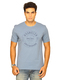

37640
Wills Lifestyle Women Red Clutch


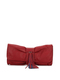

4147
Nike Women Glide White Grey Shoe


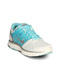

36792
Maxima Men Black Dial Attivo Watch


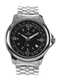

45260
CASIO G-Shock Men Black Digital Watch DW-5600E-1VDF G001


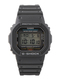

  2%|▏         | 676/44072 [00:03<05:35, 129.23it/s]

15510
Rockport Men CV Toe HI Charcoal Casual Shoes


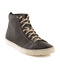

21725
ADIDAS Men Navy Blue Sweatshirt


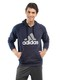

34038
Gini and Jony Boys Check Red Shirt


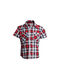

43956
Puma Women Purple Techno Sandals


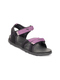

28467
Urban Yoga Women Printed Rust T-shirt


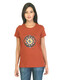

16368
Peter England Men Stripes Charcoal Trouser


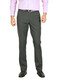

42884
French Connection Women Beige Clutch


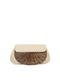

55833
Colorbar Glamour Radiant Glow 001


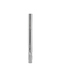

46418
Timex Men Olive Green Dial Watch DV10


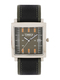

48582
Revv Men Steel Bracelet


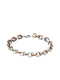

30498
Lovable Women Fiona Brown Bra


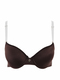

8777
Indigo Nation Men Price catch Blue Shirts


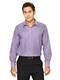

19320
Nike Unisex Classic Turf Pink Backpack


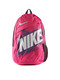

25378
Levis Men Beige Innerwear T-shirt


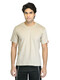

4986
ADIDAS Men Bayern Munchen Red Jersey


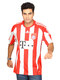

39727
Arrow Woman Blue Shirt


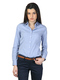

5854
ADIDAS Women Pink Handbag


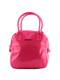

11971
Fila Men Glow White Sports Shoes


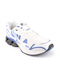

  2%|▏         | 694/44072 [00:03<05:16, 136.93it/s]

5068
Being Human Men Grey Dial Blue Strap Watch


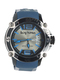

39515
Peter England Unisex Brown Laptop Bag


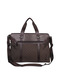

45893
Maxima Ssteele Men Black Dial Watch


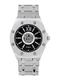

44941
Franco Leone Men Formal Shoes


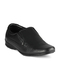

24098
Red Tape Men Black Sandals


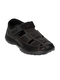

4388
DC Comics Lantern Arrow All Over Green T-shirt


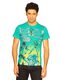

58522
Wildcraft Unisex Rust Orange Travel Pouch


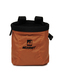

28655
Nike Men Zoom Structure White Sports Shoes


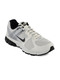

2843
Mr.Men Men's Mr.Mischief Pink T-shirt


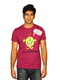

17088
Lino Perros Women Flower LT.Brown Wallet


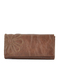

3991
Mr.Men Men's Wave Rider White T-shirt


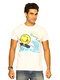

29787
Basics Men White T-shirt


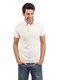

9497
Decathlon Men Arpenaz Black Sandals


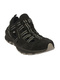

13428
United Colors of Benetton Men Printed White Tshirts


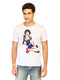

19112
Campbell Men Pack of 3 Solid Tshirts


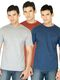

16966
Reebok Men Sprintfit Lite Black Sports Shoe


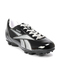

49662
United Colors of Benetton Women Sunglass


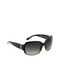

20860
United Colors of Benetton Women Casual Sunglasses


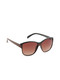

  2%|▏         | 712/44072 [00:03<04:55, 146.68it/s]

32599
ONLY Women Black Top


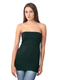

39171
Aneri Women Pink & White Kurta


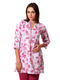

36905
Fossil Men Black Dial Watch ME1113


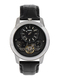

57932
French Connection Men White T-shirt


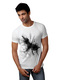

58146
Puma Unisex Black Backpack


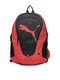

40985
Gini and Jony Boys United White T-shirt


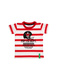

41857
Bata Men Hummer Grey Sandals


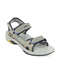

59094
Peri Peri Women Black Bra


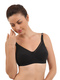

36139
Nike Men The Overplay VII Black Sports Shoes


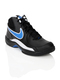

7169
Scullers Men Scul Navy Blue Shirt


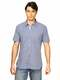

28231
Playboy Men Malibu Deo


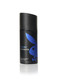

13870
Scullers Men Stripes Beige Shirts


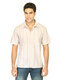

19576
United Colors of Benetton Women White Top


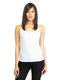

7955
Puma Men's Foundation Grey Polo T-shirt


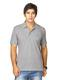

8121
Fastrack Men Brown Belt


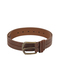

27279
Mother Earth Women Blue Kurta


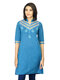

6887
Forever New Women Indigo Wash Blue Jacket


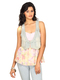

31912
Fabindia Women Green Sling Bag


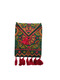

  2%|▏         | 730/44072 [00:04<04:44, 152.34it/s]

49808
iPanema Women Blue Flip Flops


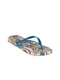

22539
Inc.5  Women Grey Flats


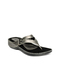

27877
Scullers For Her Women Printed Navy Blue Shirt


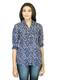

6289
Classic Polo Classic Polo Swiss Brown Tee T-Shirt


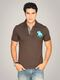

28003
Jockey ZONE Men Zone White Brief US18


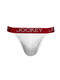

8313
Fastrack Women Nylon Black Handbag


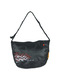

49034
Lucera Women Silver Ring


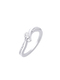

19744
ADIDAS Originals Men Solid Green Jacket


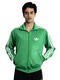

26199
Formula 1 Men Power Perfume


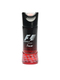

47992
Helix Women Black Watch


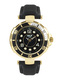

18696
Hanes Men Black Ultimate Duo Dry Cotton Stretch Bikini Briefs


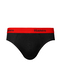

2629
Carlton London Women Four Strapped Black Sandal


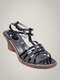

14867
United Colors of Benetton Men Solid Black Wallets


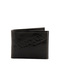

38291
Reid & Taylor Men Black Wallet


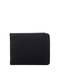

11529
United Colors Of Benetton Men Heavy Winter Grey Sweaters


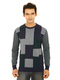

41259
Arrow Men Brown Leather Wallet


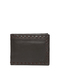

1890
FIFA Mens Essentials Red T-shirt


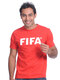

15189
Arrow Sport Men Solid Green Polo Tshirts


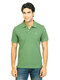

  2%|▏         | 748/44072 [00:04<04:33, 158.22it/s]

24408
ADIDAS Men Black Vanquish Sports Shoes


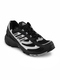

20894
Basics Men Red Casual Shoes


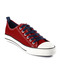

21946
Murcia Women Casual Black Handbag


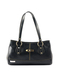

39185
Aneri Women Khaki Kurta


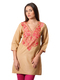

56028
Colorbar Soft Touch Spring Fling Lipstick 023


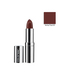

40971
Buckaroo Men Brown Casual Shoes


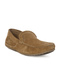

52488
Red Rose Red Camisole


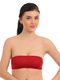

59060
Global Desi Women Multi Coloured Kurta


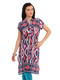

4718
Disney Kids Girl's Summer Fun Fair Yellow Teen Kidswear


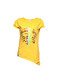

56814
Aneri Women Multi Coloured Kurti


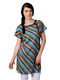

12956
ADIDAS Men Sports Blue Sports Shoes


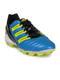

29317
ADIDAS Unisex Blue Backpack


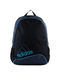

17418
CASIO ENTICER Men Black Analogue Watch BS112 


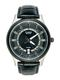

47368
Baggit Brown Handbag


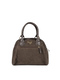

13884
Scullers Men Check Black Shirts


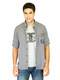

19582
United Colors of Benetton Men Printed Grey TShirt


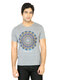

48320
Pitaraa Silver Omelette Thin Bracelet


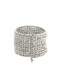

9007
Murcia Women Silver Black Purse Silver Handbags


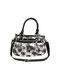

  2%|▏         | 766/44072 [00:04<04:27, 161.86it/s]

6873
Forever New Women's Top Black Dress


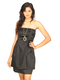

18450
Ed Hardy Life Love & Luck by Christian Audigier for Women Perfume


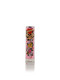

29125
Vogue Women White Sunglasses


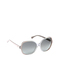

26951
Jealous 21 Women Printed Teal T-shirt


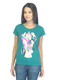

27883
Scullers For Her Women Pink Shirt


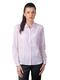

30834
Fabindia Women Blue Kurta


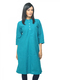

29919
Police Men Black Dial Chronograph Watch PL12699JS-02


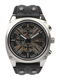

42428
Aurelia Women Brown & Orange Kurta


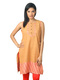

12358
Reid & Taylor Men Solid Cream Shirts


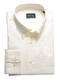

48112
Fossil Women Brown Belt


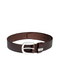

9235
Mark Taylor Men Plain Blue Shirts


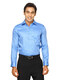

14893
United Colors of Benetton Women Solid Blue Bags


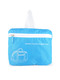

15941
Turtle Men Leather Black Belts


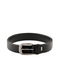

53768
Puma Men Blue T-shirt


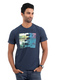

21348
Pal Zileri Men Casual Metal Frame Sunglasses


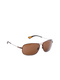

59252
Titan Men White Dial Automatic Watch NB9365SL01


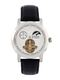

6619
ADIDAS Men's Boris White Shoe


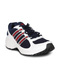

54915
Do u speak Cream Men T-shirt


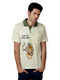

  2%|▏         | 784/44072 [00:04<04:22, 164.84it/s]

50589
Chromozome Men Navy Blue Briefs


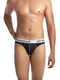

42870
French Connection Women Purple Handbag


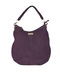

18206
Manchester United Men Solid Black Cap


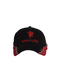

54129
Rocia Women Beige Flats


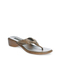

23847
ADIDAS Men White Duramo 3 Sports Shoes


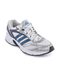

48576
Revv Men Steel Bracelet


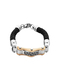

9651
Indigo Nation Men Checks Green Shirts


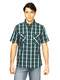

8783
Indigo Nation Men Bling PC Red Shirt


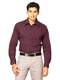

4972
Gini and Jony Boy's Kangaroo Green White Kidswear


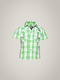

38601
Nike Men Printed Red T-shirt


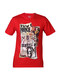

45269
CASIO Youth Series Digital Men Black Small Dial Digital Watch W-210-1CVDF I065


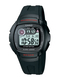

11985
Fila Men Glow Black Sports Shoes


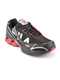

59636
FNF Sea Green Collection For Wedding Sari


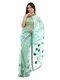

15519
Rockport Men Jelba Brown Flip Flops


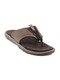

10857
Wrangler Men Rider Striper Polo White T-Shirts


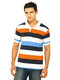

10259
John Miller Men Reglur Black Trousers


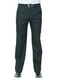

53902
Kiara Women Brown Handbag


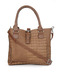

38433
Baggit Women Green Mobile Pouch


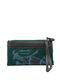

  2%|▏         | 802/44072 [00:04<04:19, 166.61it/s]

40529
Titan Women White Dial Watch


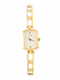

59404
Tokyo Talkies Women Blue Top


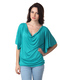

25982
J. DEL POZO Women In White Perfume 100 ml


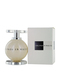

44189
iPanema Women Pink Flip Flops


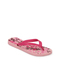

24850
Indigo Nation Men Formal Brown Belts


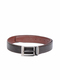

23249
Arrow Men Formal Black Shoes


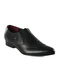

18808
Peter England Men Casual Navy Blue Belt


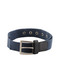

51669
Louis Philippe Men Grey Sunglasses


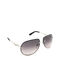

3965
Jealous 21 Women White Sleeveless Top


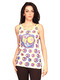

29773
Wrangler Men Green Striped Shirt


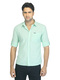

48744
Revv Men Steel Bangle


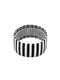

17840
Nike Men Air Quick Handle Red Sports Shoe


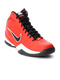

9463
John Miller Men White Shirt


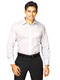

18034
Lino Perros Women Solid Beige Handbag


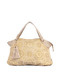

16992
Puma Women Dizzy  Black Belt


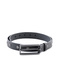

3159
Nike Men's Air Max Moto White Blue Shoe


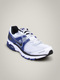

49696
Park Avenue Blue Patterned Tie


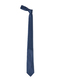

14858
United Colors of Benetton Women Solid Red Wallets


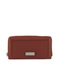

  2%|▏         | 820/44072 [00:04<04:16, 168.69it/s]

33646
Lotto Men Ridge Black Sandals


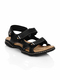

57303
Rocia Women Brown Wedges


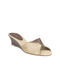

11516
Catwalk Women Lifestyle Black Heels


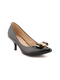

41266
Arrow Men Brown Wallet


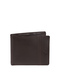

20251
Wrangler Men Heavy Grey Tshirt


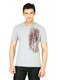

14064
Flying Machine Men Pack of 2 Stripes Red Blue Tshirts


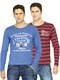

44714
Lotto Men Maroon Juve Flip Flop


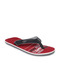

5433
Nike Men's Speed Fury Red T-shirt


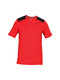

52671
Morellato Men Navy Blue Watch


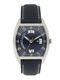

59299
U.S. Polo Assn. Men Striped Blue Shirt


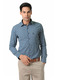

49837
iPanema Women Blue Flip Flops


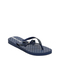

16733
Lotto Men Earth Black Slipper


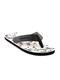

7364
Red Tape Men's Brown casual Shoe


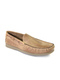

34463
ADIDAS Unisex Black Backpack


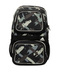

47191
Franco Leone Men Black Formal Shoes


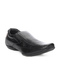

27848
Scullers For Her Navy Blue T-shirt


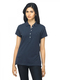

31111
Gini and Jony Boys Solid Black Jeans


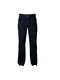

55454
Revlon Velvet Touch Royal Burgundy Lipstick 96


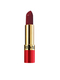

  2%|▏         | 838/44072 [00:04<04:12, 171.02it/s]

12393
Reid & Taylor Men Solid Black Socks


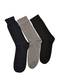

13241
Palm Tree Kids Boys Solid White Jackets


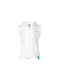

54586
Sushilas Women Printed Green Kurta


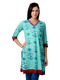

27074
Catwalk Women Blue Casual Flats


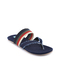

2616
Carlton London Women Gold Wedge Sandal


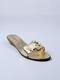

43531
French Connection Women Off White Top


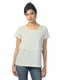

46271
109F Blue A-Line Dress


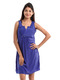

35783
Enroute Women Turquoise Blue Flats


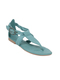

7156
Scullers Men Black Check Shirt


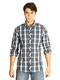

22734
Nike Women Grey Lunarglide +3 Sports Shoes


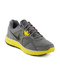

8922
Puma Men Cat  White Belt


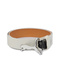

16501
Locomotive Men Printed Brown TShirt


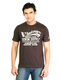

50314
Park Avenue Men Brown Tie


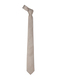

34651
Fila Women Top Fuel Black Sports Shoes


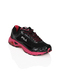

6084
UCB Men's Johny Collar With Two Tone White T-shirt


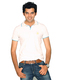

19549
United Colors of Benetton Men Solid Grey Sweatshirt


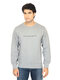

49239
Arrow Men White Cap


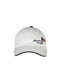

31323
Aurelia Women Printed Red Kurta


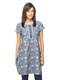

  2%|▏         | 856/44072 [00:04<04:18, 167.44it/s]

43703
Royal Diadem Red Earring & Pendant Set


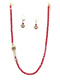

13073
Numero Uno Men White Shoes


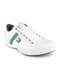

57131
Elle Women Teal Top


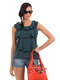

40186
Mumbai Slang Women Pink & Black Kurti


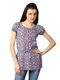

58945
Taylor of London Women White Satin Perfume


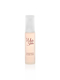

33474
Baggit Women Chotu Dum Blue Belt


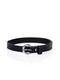

59897
Femella Women Yellow Dress


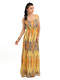

11724
Lee Women Check Red Shirts


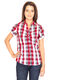

5601
Nike Men's Splash Thong Yellow Black Flip Flop


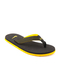

20063
United Colors Of Benetton Women Black Muffler


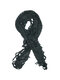

53591
Q&Q Men White Dial Watch


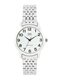

58179
Rocky S Women Blue Handbag


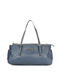

39972
GAS Men Grey Campus Casual Shoes


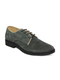

15384
Filac Men Hawai Black Slippers


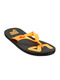

52443
Red Rose White & Green Nightdress


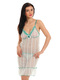

41868
Estd. 1977 Men Turquoise Blue Sandals


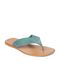

36106
OTLS Men Laurel Black Wallet


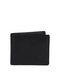

  2%|▏         | 873/44072 [00:04<04:22, 164.64it/s]

23282
Maxima Men Off White Dial Watch


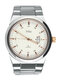

34235
Proline Men Cream-Coloured Polo T-Shirt


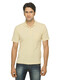

46615
Catwalk Women Red Flats


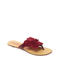

19911
Wildcraft Unisex Grey Printed Messenger Bag


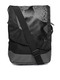

7532
Nike Men's Encourage Blue T-shirt


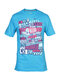

22350
John Players Men Check Blue Shirt


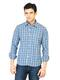

16165
Enroute Men Leather Brown Casual Shoes


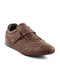

2040
ADIDAS Mens Fire White Polo T-shirt


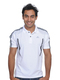

30695
Catwalk Women Bronze toned Sandals


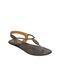

43367
Reebok Women Black Casual Shoes


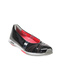

13417
United Colors of Benetton Men Solid Blue Shirts


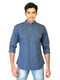

27622
Scullers Men Grey Trousers


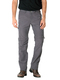

55202
Lakme Lip Love Hottie Lip Conditioner


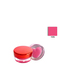

3192
Tantra Men's Prism Black T-shirt


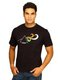

16959
Image Women Classic Eyewear Brown Sunglasses


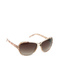

11340
Lee Men Blue Chicago Fit Jeans


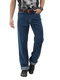

25175
Lino Perros Women Red and Grey Handbag


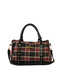

10292
Clarks Women Brown Leather Heels


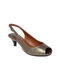

  2%|▏         | 891/44072 [00:04<04:16, 168.66it/s]

36562
Jack & Jones Men Dino White T-shirt


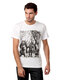

25949
Femella Women Printed Brown Scarf


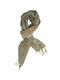

44142
dunhill Men Fresh Perfume


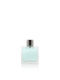

5265
Wildcraft Unisex Black & Red Messenger Bag


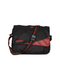

14632
United Colors of Benetton Men Solid Green Mufflers


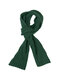

11172
Scullers Men Stripes Red Sweaters


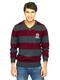

25347
Levi's Men White Brief


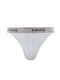

39718
Arrow Woman Beige Top


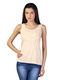

41602
Basics Men Navy Shirt


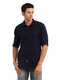

33222
Sepia Women Brown Tunic


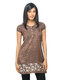

24295
Quiksilver Men Black Socks


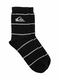

36750
Little Miss Girls Chatterbox Navy Blue Dress


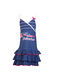

37682
American Tourister Unisex Black Backpack


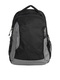

34007
Gini and Jony Girls Pink Top


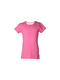

50542
Chromozome Men Red Briefs


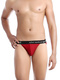

17285
U.S. Polo Assn. Men Solid Black  polo Tshirt


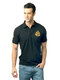

43969
DKNY Women Delicious Night Perfume


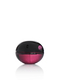

28458
Urban Yoga Women Blue Capris


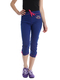

  2%|▏         | 909/44072 [00:05<04:12, 170.91it/s]

22162
Timberland Men Black Casual Shoes


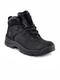

16357
Peter England Men Stripes Blue Shirt


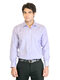

46427
Timex Men Black Dial Watch


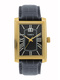

7700
Jealous 21 Women's All Girls Dying Jealousy Pink Top


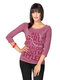

27410
Jockey Women Assorted Lounge Pants


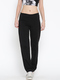

2272
Nike Mens Blue Polo T-shirt


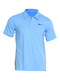

43155
Fastrack Women Black Dial Watch


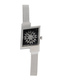

42087
ADIDAS Men White Aztek Shoes


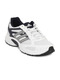

8748
Indigo Nation Men Plain Orange Shirts


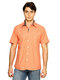

55030
Lakme Absolute Matte Milan Red Lipstick 48


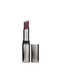

17043
Gas Men Skate 003 Casual Shoe


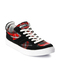

50784
Clarks Women Cream Coloured Onslow Beat Leather Wedges


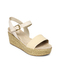

2888
Catwalk Women Wedding Heeled Bronze Heels


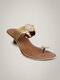

23276
Maxima Ssteele Men Black Watch


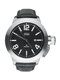

6414
Lotto Men's Thong Blue White Flip Flop


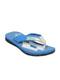

18837
Peter England Men Formal Brown Belt


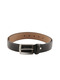

35313
Fabindia Women Anusuya Silver Earrings


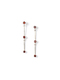

51656
Fossil Men Black Dial Chronograph Watch CH2737


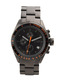

  2%|▏         | 927/44072 [00:05<04:14, 169.57it/s]

16191
Puma Men Graphic White TShirt


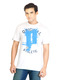

30661
Park Avenue Men Black Sunglasses


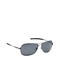

43393
Lino Perros Men Brown Wallet


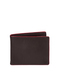

26704
Nike Men White T-Lite 9 SL Shoes


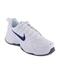

12531
Puma Women Solid Pink Sweatshirts


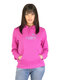

42241
Sepia Women Purple Top


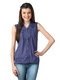

56473
Streetwear Grape Shimmer Nail Polish 41


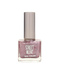

25181
Lino Perros Women Leatherite Brown Handbag


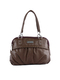

24053
Locomotive Men Printed Charcoal T-shirt


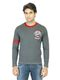

10266
Clarks Men Goto Hi Cola Suede Brown Shoes


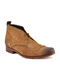

40516
Titan Men White Dial Watch


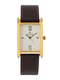

15714
Nike Men Free Run+ 2 Black Sports Shoes


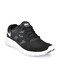

21521
Kiara Women Rose Pink Handbag


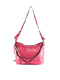

4343
Fila Men Leonard Red Shoes


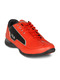

5291
Lee Cooper Men Black Semi Formal Shoe


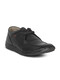

53101
Fabindia Silver Drop Earrings


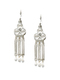

32304
Q&Q Women White Dial Watch


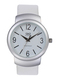

10054
Reebok Kids Kkr Boy's Premium Blue Jerseys


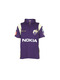

  2%|▏         | 945/44072 [00:05<04:15, 168.98it/s]

4171
Reebok Men's Easytone Inspire White Shoe


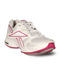

45256
Casio Edifice Men Analog Watch EF-130D-1A5VDF(ED419)


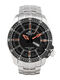

59609
FNF Khaki Collection for Wedding Sari


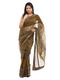

15526
Rockport Women Jeanie Oneband Brown Flats


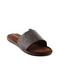

21713
Fossil Men Blue Dial Chronograph Watch CH2752


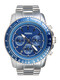

44384
Spinz Women Enchante Deo


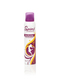

37676
American Tourister Unisex Black Backpack


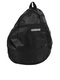

6626
ADIDAS Men's Canon Dialect Blue Yellow Shoe


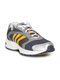

47501
Footfun Kids Unisex Red Shoes


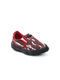

17271
U.S. Polo Assn. Men Stripes DK.Grey Polo Tshirt


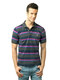

23044
Arrow Woman Brown Jeggings


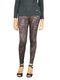

22196
Timberland Men Black Casual Shoes


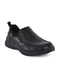

51464
Tonga Women Olive Top


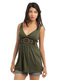

54116
Rocia Women Maroon Sandals


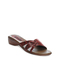

30453
Deni Yo Men White Jeans


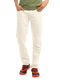

2286
Nike Men Black Sweatshirt


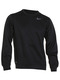

23878
Fila Women Sleeker Green Check Casual Shoes


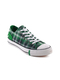

48549
Wrangler Women Black Belt


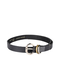

  2%|▏         | 963/44072 [00:05<04:11, 171.13it/s]

42073
American Tourister Men Black Wallet


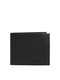

31581
Mark Taylor Men Printed Blue T-shirt


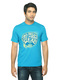

3354
Myntra Men's I Give 100 Percent Work White T-shirt


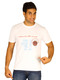

26536
ID Men White Shoes


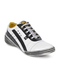

12703
Nike Women Downshifter White Sports Shoes


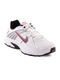

24605
Vishudh Women Pink Churidar Kurta with Dupatta


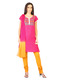

10430
Flying Machine Men Ydc Blue Shirts


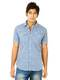

56225
SDL by Sweet Dreams Men Black & Grey Pyjama Set


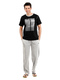

39388
Peter England Men Black Jeans


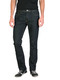

14090
Flying Machine Men Stripes Blue Polo Tshirts


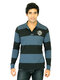

53757
Puma Women Speeder Wns Ind White Sports Shoes


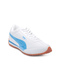

37212
United Colors of Benetton Men Pink Shirt


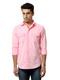

4515
Puma Men's Tarun White Silver Red Shoe


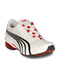

45632
Park Avenue Men Grey Melange Briefs


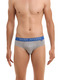

51000
Enamor Maroon Bra FB06


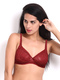

7390
Red Tape Men Brown Shoes


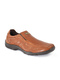

35545
Enroute Teens Brown Sandals


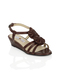

6242
Lee Women's Rihana Purple T-shirt


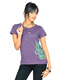

  2%|▏         | 981/44072 [00:05<04:12, 170.58it/s]

47165
Peter England Men Black Belt


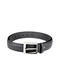

17615
Doodle Boys living Upto White Tshirt


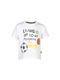

48911
Lucera Women Silver Pendant with Chain


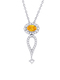

29926
Police Men Black Dial Watch PL12778MSU-61


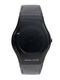

42417
American Tourister Unisex Purple Messenger Bag


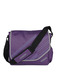

3730
CSK Mens Fangear Yellow Jersey


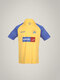

26152
John Miller Men Striped Grey Trousers


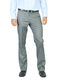

12367
Reid & Taylor Men White Shirt


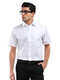

54572
Sushilas Women Multi Coloured Kurta


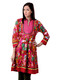

27080
Catwalk Women Silver Flats


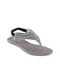

30037
SKAGEN DENMARK Men Silver-Toned Dial Watch 233LSS


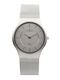

46285
109F Women Multi Coloured Dress


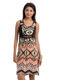

12969
ADIDAS Men Snova Glide Blue Sports Shoes


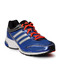

35777
Force 10 Men Black & Green Sports Shoes


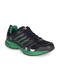

51232
Satya Paul Women Green Printed Kaftan


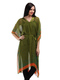

17427
CASIO G-Shock Men White Analogue & Digital Watch G274


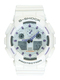

9804
John Miller Men Black Checks Shirts


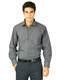

23612
Nike Fragrances Women Sensual Touch Perfume


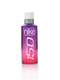

  2%|▏         | 999/44072 [00:05<04:15, 168.36it/s]

6070
UCB Women's Young Pigment Blue T-shirt


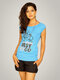

  2%|▏         | 1000/44072 [00:05<04:02, 177.56it/s]


UpdateResult(operation_id=0, status=<UpdateStatus.COMPLETED: 'completed'>)

In [ ]:
import uuid
from qdrant_client.http.models import PointStruct
from tqdm import tqdm


ids = data['id']
dispaly_name = data['productDisplayName']

points = []

for embadding, image, ids, productDisplayName in tqdm(zip(image_embeddings, images[0:1000], ids[0:1000], dispaly_name[0:1000]), total=len(ids)):
    print(str(ids))
    print(productDisplayName)
    display(image)
    payload = {"ids": ids, "productDisplayName": productDisplayName, "base_64_image": pil_image_to_base64(image)}
    embeddings = embadding.tolist()
    point_id = str(uuid.uuid4())  # Generate a unique ID for the point
    points.append(PointStruct(id=point_id, payload=payload, vector={"image": embeddings}))

client.upsert(
    collection_name="mycollection",
    wait=True,
    points=points
)


#lets test text-to-image search

In [ ]:
q="watch for man"
query_embedding = model.encode(q)

In [ ]:
image_hits = client.search(
 collection_name='mycollection',
 query_vector=models.NamedVector(
 name="image",
 vector=query_embedding.tolist()
 ),
 limit=3
 )

In [ ]:
from IPython.display import display
import io

def display_base64_image(base64_string):
    image_data = base64.b64decode(base64_string)
    image_bytes = io.BytesIO(image_data)
    image = Image.open(image_bytes)
    display(image)

Fastrack Unisex Black Dial Watch 9915PP13


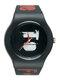

Fastrack Men Black Watch


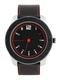

Carrera Men Dial steel finish strap Silver Watches


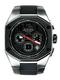

In [ ]:
for products in image_hits:
  print(products.payload['productDisplayName'])
  display_base64_image(products.payload['base_64_image'])

# lets test image-to-image search

In [ ]:
from PIL import Image

# Assuming 'image_path' is the path to your image file
image_path = "/content/81Ubld74wML._AC_UY1000_.jpg"  # Update this with your image file path
try:
    # Open the image file
    img = Image.open(image_path)

    # Display the image (optional)
    img.show()

    # Further operations can be performed on the 'img' PIL image object

except FileNotFoundError:
    print("The specified file does not exist.")
except Exception as e:
    print("An error occurred:", e)

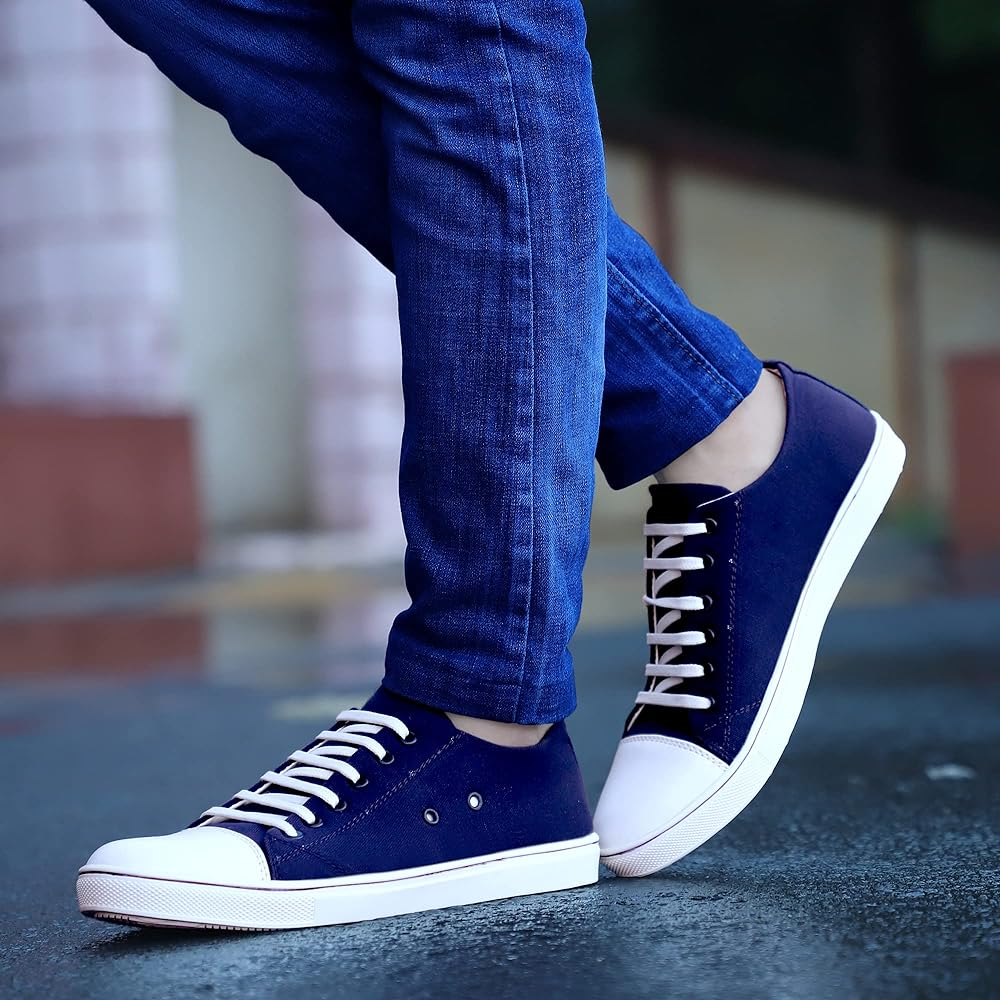

In [ ]:
display(img)

In [ ]:
query_embedding = model.encode(img)

In [ ]:
image_hits = client.search(
 collection_name='mycollection',
 query_vector=models.NamedVector(
 name="image",
 vector=query_embedding.tolist()
 ),
 limit=3
 )

Lotto Unisex Canvas Black Check Shoe


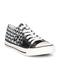

FILA Men Liga II Black Shoes


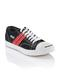

Vans Men Blue Era Scilla Plaid Shoes


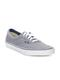

In [ ]:
for products in image_hits:
  print(products.payload['productDisplayName'])
  display_base64_image(products.payload['base_64_image'])